# Distribution of backgrounds, control sample and neutrino box in RA and Dec

### May 2, 2021

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
%matplotlib inline
# sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/SourceSearch")
# import deDisperse_util as util
import matplotlib.colors as colors

my_path_plots = os.path.abspath("./plots/")
import re


Welcome to JupyROOT 6.18/04


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


## Read an join files

In [3]:
directory = "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/results/gridSearch/A2/c1/"
files = []
for filename in os.listdir(directory):
    if filename.endswith("0.txt"):
        files.append(filename)

In [4]:
with open(directory+"c1_joined.txt", 'w') as outfile:
    outfile.write("slope,SoverSup\n")
    for fname in files:
        with open(directory + fname) as infile:
            outfile.write(infile.read()+"\n")

In [5]:
grid = pd.read_csv(directory+"c1_joined.txt")
grid.columns

Index(['slope', 'SoverSup'], dtype='object')

Text(0,0.5,'$S/S_{up}$')

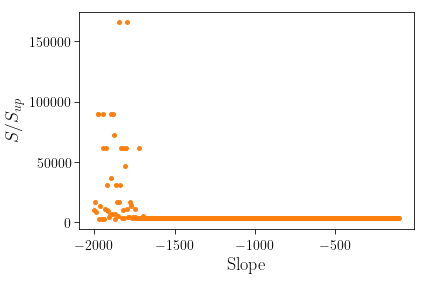

In [6]:
plt.scatter(grid.slope, grid.SoverSup, s = 15, c = "C1")
# plt.yscale("log")
# plt.ylim(1500,2500)
plt.xlabel("Slope")
plt.ylabel("$S/S_{up}$")

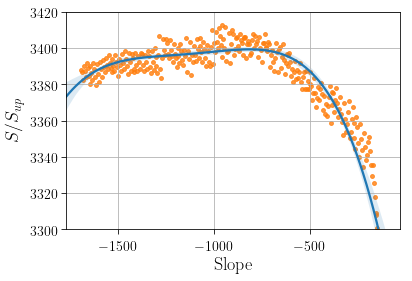

In [7]:
sns.regplot(x="slope", y ="SoverSup" , data = grid.loc[grid.slope>-1700], order = 4, scatter_kws={"s": 15, "color":"C1"})
# plt.scatter(grid.slope, grid.SoverSup)

# plt.yscale("log")
plt.ylim(3300,3420)
plt.xlabel("Slope")
plt.ylabel("$S/S_{up}$")
plt.grid()

# Try 2

In [8]:

f = ROOT.TFile.Open("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/A2_optimize_pol0_slope-700_debug.root","READ")

Error in <TFile::TFile>: file /users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/A2_optimize_pol0_slope-700_debug.root does not exist


In [9]:
t = f.Get("OutputTree")

ReferenceError: attempt to access a null-pointer

In [ ]:
t.Print()

In [ ]:
t.GetEntries()
t.GetEntry(0)
print(t.backgrounds)

In [3]:
slope =[[],[]]
S_overSup = [[],[]]
directory = "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/results/gridSearch/A2/all/"
for pol in np.array([0,1]):
    files = []
    for filename in os.listdir(directory):
        if filename.startswith("A2_optimize_pol%i"%pol):
            try:
                f = ROOT.TFile.Open(directory+filename)
                t = f.Get("OutputTree")
                t.GetEntry(0)

            except:
                continue
    #         print(t.pVal)
            if(t.fitConverge==False):
                print(t.fitConverge)
                continue
            slope[pol].append(t.slope)
            SoverSup = []
            S=[]
            Sup=[]
            intercept=[]
            t.GetEntry(0)
            for s in zip(t.S_up, t.signal, t.intercept):
                Sup.append(s[0])
                S.append(s[1])
                intercept.append(s[2])
            df = pd.DataFrame({"intercept":intercept, "Sup":Sup, "S":S})
            df = df.loc[df.Sup>0.5]
            S_overSup[pol].append(max(df.S/df.Sup))
            f.Close()

Warning in <TFile::Init>: file /users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/results/gridSearch/A2/all/A2_optimize_pol1_slope-2490.root has no keys


In [4]:
# df = pd.DataFrame({"S_overSup_V":S_overSup[0], "slopeV":slope[0],"S_overSup_H":S_overSup[1], "slopeH":slope[1]})
dfV = pd.DataFrame({"S_overSup_V":S_overSup[0], "slopeV":slope[0]})
dfH = pd.DataFrame({"S_overSup_H":S_overSup[1], "slopeH":slope[1]})
dfH = dfH.loc[dfH.slopeH>-2000]
dfV = dfV.loc[dfV.slopeV>-2000]

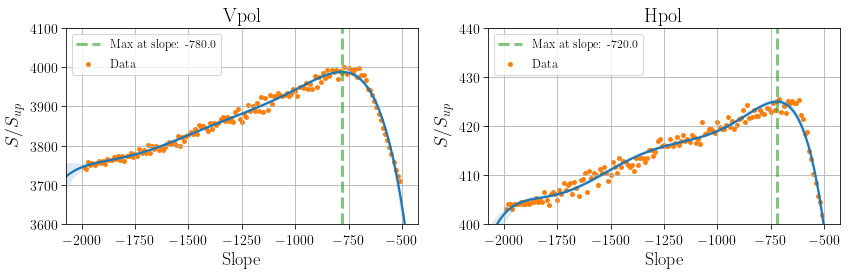

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

z = np.polyfit(dfV.slopeV, dfV.S_overSup_V, 6)
poly = np.poly1d(z)
maxSlopeV = np.array(dfV.slopeV)[np.argmax(poly(dfV.slopeV))]
sns.regplot(x="slopeV", y ="S_overSup_V" , data = dfV, order = 6, line_kws={"color":"C0"}, scatter_kws={"s": 15, "color":"C1"},ax=axes[0], label = "Data",x_estimator=np.mean,
            )
axes[0].grid()
axes[0].set_ylabel("$S/S_{up}$")
axes[0].set_xlabel("Slope")
axes[0].set_title("Vpol")
axes[0].axvline(maxSlopeV, c="C2", lw = 3, alpha = 0.6,ls="--", label="Max at slope: %0.1f"%maxSlopeV)
axes[0].legend()
axes[0].set_ylim(3600,4100)

z = np.polyfit(dfH.slopeH, dfH.S_overSup_H, 6)
poly = np.poly1d(z)
maxSlopeH = np.array(dfH.slopeH)[np.argmax(poly(dfH.slopeH))]
sns.regplot(x="slopeH", y ="S_overSup_H" , data = dfH, order = 6, line_kws={"color":"C0"}, scatter_kws={"s": 15, "color":"C1"},ax=axes[1], label = "Data",x_estimator=np.mean,
            )
axes[1].grid()
axes[1].set_ylabel("$S/S_{up}$")
axes[1].set_xlabel("Slope")
axes[1].set_title("Hpol")
axes[1].axvline(maxSlopeH, c="C2", lw = 3, alpha = 0.6,ls="--", label="Max at slope: %0.1f"%maxSlopeH)
axes[1].legend()
axes[1].set_ylim(400,440)

fig.tight_layout()
plt.savefig("./A2_c1_gridSearch_slope.pdf")

# Plot S/S_up

In [21]:
f = ROOT.TFile.Open("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/results/gridSearch/A2/all/A2_optimize_pol0_slope-1380.root","READ")

In [22]:
t = f.Get("OutputTree")
# t.Print()

In [23]:
S=[]
Sup=[]
intercept=[]
t.GetEntry(0)
for s in zip(t.S_up, t.signal, t.intercept):
#     print(s[0],s[1],s[2])
    Sup.append(s[0])
    S.append(s[1])
    intercept.append(s[2])

In [24]:
df = pd.DataFrame({"intercept":intercept, "Sup":Sup, "S":S})
df = df.loc[df.Sup>0.1]

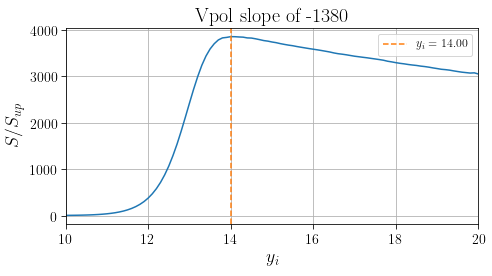

In [47]:
plt.figure(figsize=(7,4))
plt.plot(df.intercept, df.S/df.Sup)
# plt.yscale('log')
plt.axvline(df.intercept[np.argmax(df.S/df.Sup)], c="C1", ls = "--", label = "$y_i = %0.2f$"%df.intercept[np.argmax(df.S/df.Sup)])
plt.ylabel("$S/S_{up}$")
plt.xlabel("$y_i$")
plt.xlim(10,20.)
plt.title("Vpol slope of -1380")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./SoverSup_interceptScan_example.pdf")

In [38]:
df.intercept[40]

14.0